Import Necessary Packages

In [ ]:
!python -m pip install -U git+https://github.com/wmayner/pyphi.git@feature/iit-4.0

In [ ]:
import pyphi
import math
import numpy as np

pyphi.config.WELCOME_OFF = True
pyphi.config.PROGRESS_BARS = False


In [ ]:
import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(0)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations_with_replacement
from mpl_toolkits import mplot3d
import pandas as pd

!pip install -U pynwb
from pynwb import NWBHDF5IO
!pip install nwbwidgets
from nwbwidgets import nwb2widget
import pyphi
pyphi.config.PROGRESS_BARS = False
pyphi.config.WELCOME_OFF = True



sns.set_style("white")
sns.set_context("talk")
color_names = ["windows blue",
               "red",
               "amber",
               "faded green",
               "dusty purple",
               "orange",
               "clay",
               "pink",
               "greyish"]

colors = sns.xkcd_palette(color_names)
from matplotlib.colors import ListedColormap

cmap = ListedColormap(colors)

In [ ]:
!ls
filepath = '/Users/poggi/Documents/Maier Lab/NWB Data/sub-699733573_ses-715093703.nwb'
io = NWBHDF5IO(filepath, 'r',load_namespaces = True)  # open the file in read mode 'r'
nwb = io.read() # nwb dataset
nwb2widget(nwb)


In [ ]:
# grab all the flash presentation data
intervals_dict = nwb.intervals
flashes_presentations = intervals_dict['flashes_presentations'].to_dataframe()
stim_on_times = flashes_presentations.start_time[:].to_numpy()
# stim_on_times and N_trials are our desired output for the next step
N_trials = len(stim_on_times)
print(N_trials)
print(intervals_dict.keys())

In [ ]:
# get time intervals for neurons
one_second = flashes_presentations.start_time[0] + 1
five_seconds = flashes_presentations.start_time[0] + 5
print(five_seconds)
six_seconds = flashes_presentations.start_time[0] + 6
print(six_seconds)
ten_seconds = flashes_presentations.start_time[0] + 10
eleven_seconds = flashes_presentations.start_time[0] + 11

In [ ]:
units_df = nwb.units.to_dataframe()
units_df

In [ ]:
# These are your options for channel area
x = np.array(nwb.electrodes["location"].data[:])
np.unique(x)

In [ ]:
# first we find the brain area that each electrode was determined to be in
elLocationLabel = nwb.electrodes["location"].data[:]
# Then we use numpy to search this array for cells labeled "VISP"
import numpy as np
x = np.array(elLocationLabel)
locIdx_LGd = np.where(x == 'LGd')
locIdx_VISp = np.where(x == 'VISp')
locIdx_VISpm = np.where(x == 'VISpm')
locIdx_VISl = np.where(x == 'VISl')
locIdx_VISrl = np.where(x == 'VISrl')


# We can then tie the index of the V1 locations to specific probe ID
elLocationID = nwb.electrodes["id"].data[:]
elID_LGd   = elLocationID[locIdx_LGd]
elID_VISp   = elLocationID[locIdx_VISp]
elID_VISpm   = elLocationID[locIdx_VISpm]
elID_VISl   = elLocationID[locIdx_VISl]
elID_VISrl   = elLocationID[locIdx_VISrl]

In [ ]:
# Find index for good units
y = np.array(units_df.quality)
goodUnit = np.where(y == 'good')[0]
# Find index for units in desired area
cids = units_df.peak_channel_id.to_list()
unitsToUse_idx_LGd = [a for a in goodUnit if cids[a] in elID_LGd]
unitsToUse_idx_VISp = [a for a in goodUnit if cids[a] in elID_VISp]
unitsToUse_idx_VISpm = [a for a in goodUnit if cids[a] in elID_VISpm]
unitsToUse_idx_VISl = [a for a in goodUnit if cids[a] in elID_VISl]
unitsToUse_idx_VISrl = [a for a in goodUnit if cids[a] in elID_VISrl]

unitsToUse_LGd = nwb.units[unitsToUse_idx_LGd]
unitsToUse_VISp = nwb.units[unitsToUse_idx_VISp]
unitsToUse_VISpm = nwb.units[unitsToUse_idx_VISpm]
unitsToUse_VISl = nwb.units[unitsToUse_idx_VISl]
unitsToUse_VISrl = nwb.units[unitsToUse_idx_VISrl]

In [ ]:
# find the units in unitsToUse_VISp that show up the most
spike_data_VISp = []
indexes_in_VISp = []
for i in range(len(unitsToUse_VISp['spike_times'])):
    spikes = len(unitsToUse_VISp['spike_times'].iloc[i])
    spike_data_VISp.append(len(unitsToUse_VISp['spike_times'].iloc[i]))

# find the indexes of the three units with the highest number of spikes in unitsToUse_VISp
sorted_indexes = np.argsort(spike_data_VISp)[::-1] # [::-1] is used to reverse the order
top_three_indexes = sorted_indexes[:3]
top_three_units = unitsToUse_VISp.iloc[top_three_indexes]

print(top_three_units)


# print the top three unit IDs and their respective spike counts
for i, row in top_three_units.iterrows():
    print("Local index", row['local_index'], "with highest number of spikes:", len(row['spike_times']))



In [ ]:
# locate the units in the units_df
unit_local_index_450 = units_df.loc[950931254,'spike_times']
unit_local_index_410 = units_df.loc[950930407,'spike_times']
unit_local_index_437 = units_df.loc[950930985,'spike_times']

print(len(unit_local_index_450), len(unit_local_index_410), len(unit_local_index_437))

In [ ]:
# plot the spike times for the top three units between 1275.5 and 1280.5 seconds with each unit having a different row
y_vals = [1,2,3]
plt.figure(figsize=(20,3))
plt.plot(unit_local_index_450, np.ones_like(unit_local_index_450)*y_vals[0], '|', markersize=10, color='red')
plt.plot(unit_local_index_410, np.ones_like(unit_local_index_410)*y_vals[1], '|', markersize=10, color='blue')
plt.plot(unit_local_index_437, np.ones_like(unit_local_index_437)*y_vals[2], '|', markersize=10, color='green')
plt.xlim(one_second, six_seconds)
plt.ylim(0.5, 3.5)
# only show whole number y values
plt.yticks(y_vals)
plt.xlabel('Time (s)')
# set y ticks as [450, 410, 437]
plt.yticks(y_vals, [450, 410, 437])
plt.ylabel('Unit')
plt.title('Top Three Neurons Raster Plot')
# save image as top three units raster plot
plt.savefig('top_three_units_raster_plot.png')
plt.show()


# Count the number of spikes for each unit in the specified time range
spike_counts = [np.count_nonzero((unit_spike_times > one_second) & (unit_spike_times < six_seconds)) for unit_spike_times in [unit_local_index_450, unit_local_index_410, unit_local_index_437]]
print('Spike counts:', spike_counts)

In [ ]:
# make a matrix of the spike times for the top three units between 1275.5 and 1280.5 seconds approximately
# This one is down-sampled from 30kHz to 1kHz
t_start = one_second
t_end = ten_seconds
dt = 1./1000

num_units = 3
units = top_three_units
# Compute the number of time bins based on the time range and resolution
num_time_bins = int((t_end - t_start) / dt)
print(num_time_bins)

# Create an array of time values for each bin
bin_edges = np.linspace(t_start, t_end, num_time_bins+1)

histograms = []
for i in range(len(units)):
    unit_spikes = units.iloc[i]['spike_times']
    unit_histogram, _ = np.histogram(unit_spikes, bin_edges)
    histograms.append(unit_histogram)

# Convert the list of histograms to a spike matrix
spike_matrix_down_sampled = np.vstack(histograms)
print(spike_matrix_down_sampled.shape)
# Count the number of spikes in the first row of the spike matrix
num_spikes_unit_450 = np.sum(spike_matrix_down_sampled[0, :])
num_spikes_unit_410 = np.sum(spike_matrix_down_sampled[1, :])
num_spikes_unit_437 = np.sum(spike_matrix_down_sampled[2, :])
print('Number of spikes in first row: {}'.format(num_spikes_unit_450))
print('Number of spikes in second row: {}'.format(num_spikes_unit_410))
print('Number of spikes in third row: {}'.format(num_spikes_unit_437))

In [ ]:
# Transpose matrix to make state-by-state TPM
allData = spike_matrix_down_sampled
allData = allData.T
print(allData.shape)
print(type(allData))

In [ ]:
if allData.dtype == np.float64:
    print("Array 'allData' is of type float")
elif allData.dtype == np.int64:
    print("Array 'allData' is of type int64")
else:
    print("Array 'allData' is of a different type")

In [ ]:
# get all possible unique states from the data
possible_states = np.unique(allData, axis =0)
print(possible_states.shape)
# make a figure of all the possible states
figure_data = np.array(possible_states)
matplotlib.pyplot.spy(figure_data, precision=0.01, markersize=10)
plt.title('Possible States')
plt.xlabel('Unit')
plt.ylabel('State')
# make figure smaller
plt.rcParams['figure.figsize'] = [8, 8]
# set y ticks from 1 to 8 instead of 0 to 7
plt.yticks([0,1,2,3,4,5,6,7], [1,2,3,4,5,6,7,8])
# make x ticks A,B,C
plt.xticks([0,1,2], ['A', 'B', 'C'])
# set x ticks on the bottom of the figure instead of the top
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False)
plt.show()

# print all possible states
for i in range(possible_states.shape[0]):
    print(possible_states[i,:])

In [ ]:
# create a matrix of zeros to store transition probabilities
tpm_state_by_state = np.zeros((possible_states.shape[0], possible_states.shape[0]))

# loop over each possible state at time t
for i in range(possible_states.shape[0]):
    state_t = possible_states[i, :]

    # find the indices where state_t appears in allData
    idx_t = np.all(allData == state_t, axis=1)

    # find the indices where state_t+1 appears in allData
    idx_t_plus_1 = np.where(idx_t)[0] + 1

    # exclude the last index to prevent out of bounds error
    if np.any(idx_t_plus_1 >= allData.shape[0]):
        idx_t_plus_1 = idx_t_plus_1[:-1]

    # get the state at time t+1 for each occurrence of state_t
    states_t_plus_1 = allData[idx_t_plus_1, :]

    # loop over each possible state at time t+1
    for j in range(possible_states.shape[0]):
        state_t_plus_1 = possible_states[j, :]

        # find the indices where state_t+1 matches state_t_plus_1
        idx_t_plus_1_matching = np.all(states_t_plus_1 == state_t_plus_1, axis=1)

        # calculate the transition probability from state_t to state_t_plus_1
        tpm_state_by_state[i, j] = np.sum(idx_t_plus_1_matching) / np.sum(idx_t)

# graph state by state transition matrix with a heatmap
plt.imshow(tpm_state_by_state, cmap='BuPu', interpolation='nearest')
plt.title('State by State Transition Matrix')
plt.xlabel('State')
plt.ylabel('State')
# print legend with percentages for each state
for i in range(tpm_state_by_state.shape[0]):
    for j in range(tpm_state_by_state.shape[1]):
        plt.text(j, i, '{:.2f}'.format(tpm_state_by_state[i, j]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='white' if tpm_state_by_state[i, j] > 0.5 else 'black')

#save figure
#plt.savefig('tpm_state_by_state.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# convert state by state TPM to state by node TPM
sbn_tpm = pyphi.convert.state_by_state2state_by_node(tpm_state_by_state)
print(sbn_tpm.shape)
# convert state by node TPM to state by state TPM to make it conditionally independent
sbs_tpm= pyphi.convert.state_by_node2state_by_state(sbn_tpm)
print(sbs_tpm.shape)

# use state by state TPM as Phi Input
pyPhiInput = sbs_tpm
labels = ('A','B','C')
# create network 
network = pyphi.Network(pyPhiInput, node_labels=labels)
node_indices = (0,1,2)
states = possible_states

In [ ]:
# Define an array to store the phi values for each state
phi_values = np.zeros(len(states))

# Define variables to store the maximum phi value and its corresponding state
max_phi = -np.inf
max_phi_state = None

# Loop through each possible state
for i, state in enumerate(states):
    # Create the candidate subsystem
    candidate_system = pyphi.Subsystem(network, state, node_indices)

    # Compute the big phi value for the candidate subsystem
    phi_structure = pyphi.new_big_phi.phi_structure(candidate_system)
    big_phi = phi_structure.big_phi

    # Store the big phi value in the array
    phi_values[i] = big_phi

    # Update the maximum big phi value and its corresponding state if necessary
    if big_phi > max_phi:
        max_phi = big_phi
        max_phi_state = state

print("Maximum big phi value:", max_phi)
print("State with maximum big phi value:", max_phi_state)

# Cause-effect structure and big Φ

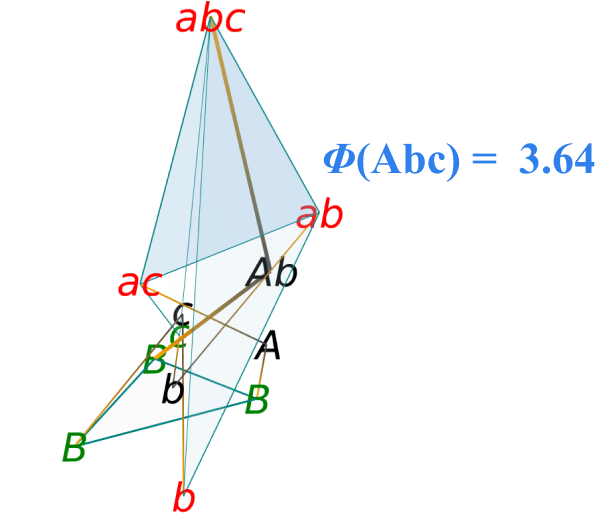

Figure from IIT 4 Demo Notebook : https://colab.research.google.com/github/wmayner/pyphi/blob/feature/iit-4.0/docs/examples/IIT_4.0_demo.ipynb

In [ ]:
# create variable for max ssytem
max_candidate_system = pyphi.Subsystem(network, max_phi_state, node_indices)
# create system irreducibility analysis of max system
sia = pyphi.new_big_phi.sia(max_candidate_system)
print(sia)
#text_output = str(sia)
#with open('sia_maxphi_5secs_3neurons_sbs.txt', 'w') as f:
  #f.write(text_output)
#files.download('sia_maxphi_5secs_3neurons_sbs.txt')

In [ ]:
# make the phi structure of the max system 
phi_structure = pyphi.new_big_phi.phi_structure(max_candidate_system)
print(phi_structure)
text_output = str(phi_structure)
#with open('phi_structure_5secs_3neurons_sbs.txt', 'w') as f:
  #f.write(text_output)
#files.download('phi_structure_5secs_3neurons_sbs.txt')

In [ ]:
# φ_s
print(f"φ_s = {phi_structure.sia.phi}")
# Big Φ (sum of distinctions and relations' small φ)
print(f"  Φ = {phi_structure.big_phi}")

In [ ]:
# find the distinctions of the max phi structure 
phi_structure.distinctions

In [ ]:
# Find the relations of the max phi structure
phi_structure.relations